# El método de Euler mejorado aplicado a sistemas de EDOs

<ul id="top">
<li><a href="#1-Implementación-del-método-de-Euler-mejorado">1-Implementación del método de Euler mejorado</a></li>
<li><a href="#2-Error-de-los-métodos-de-Euler-y-Euler-mejorado">2-Error de los métodos de Euler y Euler mejorado</a></li>
      <ul>
        <li><a href="#Problema-Robot-Móvil">Problema Robot Móvil</a></li>
        <li><a href="#Estudio-del-Error">Estudio del Error</a></li>
      </ul>
<li><a href="#Valoración">Valoración</a></li>
</ul>  

In [1]:
using LinearAlgebra
using Plots

## 1-Implementación del método de Euler mejorado

Queremos simular numéricamente la evolución de sistemas modelados por 
ecuaciones diferenciales ordinarias (EDOs) de dimensión $d\geq 1$ de la forma

<a id='Edo-Compacta'></a>
\begin{equation*}
\frac{d}{dt} u = f(t,u,p). \hspace{10em} \tag{1}
\end{equation*}

donde $u =(u^1,\ldots,u^d) \in \mathbb{R}^d$ es el _vector de estado_ del sistema, y $p \in \mathbb{R}^m$ es un vector de parámetros constantes del sistema.

Sabemos que, fijado el vector $p$ de parámetros constantes, 
dados $t_0 \in \mathbb{R}$ y $u_0 =(u^1_0,\ldots,u^d_0) \in \mathbb{R}^d$, existe una única solución $u(t)$ de [(1)](#Edo-Compacta) que satisfaga la condición inicial

<a id='Cond-Ini'></a>
\begin{equation*}
  u(t_0)=u_0. \hspace{12em} \tag{2}
\end{equation*}

En la práctica, nos interesará calcular de forma aproximada la solución $u(t)$ para un cierto intervalo temporal $t \in [t_0,T]$. Se aproximará dicha solución en una discretización del tiempo obtenida de dividir el intervalo temporal $[t_0,T]$ en $n$ partes iguales. Es decir,  se tomará los valores discretos del tiempo $t_0,t_1,t_2,\ldots,t_{n-1},t_n=T$, donde $t_k=t_{0}+k h$, con $h=(T-t_0)/n$, y se calcularán las aproximaciones 
$u_k =(u^1_k,\ldots,u^d_k) \approx u(t_k)$ para $k=0,1,\ldots,n$.

### 1.1- Ejercicio

Para realizar los ejercicios de simulación que siguen, se debe primeramente implementar el método de Euler mejorado en Julia. Se definirá una función (que llamaremos EulerMejorado) que toma como argumentos de entrada $u0, t0, T, n, f, p, m$.

El significado de los primeros seis argumentos de entrada de dicha función se puede deducir de las consideraciones de arriba. Como argumento de entrada adicional, se considerará un entero positivo $m$ cuyo significado se explicará a continuación, y cuyo valor por defecto será $m=1$. (Es decir, si cuando se invoca a la función EulerMejorado, se dan como argumentos de entrada $u0, t0, T, n, f, p$, se considerará que $m=1$.

Si $m=1$, ello indicará que para cada $j=1,\ldots,n$, se obtendrá la aproximación $u_j \approx u(t_j)$ aplicando un paso de longitud $h=(T-t_0)/n$ del método de Euler mejorado. En cambio, si $m>1$, cada aproximación $u_j \approx u(t_j)$ se obtendrá aplicando $m$ pasos de longitud $h=(T-t_0)/(n m)$ del método de Euler mejorado. Esto último será conveniente si sólo queremos los resultados para $n+1$ tiempos, pero la aproximación obtenida con el método de Euler mejorado con $h=(T-t_0)/n$ no es suficientemente precisa.



El argumento de entrada $f$ es el nombre de una función previamente definida, tal que dados $t \in \mathbb{R}$, un vector $u \in \mathbb{R}^d$, y un vector de parámetros $p\in \mathbb{R}^m$,
devuelve un vector $f(t,u,p) \in \mathbb{R}^d$. Dicha función determina un sistema de EDOs de la forma [(1)](#Edo-Compacta).

La función EulerMejorado debe devolver como argumento de salida una matriz $W \in \mathbb{R}^{(n+1) \times (d+1)}$

\begin{eqnarray*}
W = \left(
     \begin{array}{cccc}
t_0    &   u^1_0 & \cdots& u^d_0  \\
t_1    &    u^1_1 & \cdots& u^d_1  \\
\vdots &  \vdots & \vdots& \vdots \\
t_{n}  &      u^1_n & \cdots& u^d_n
     \end{array}
\right),
\end{eqnarray*} 

donde $t_k = t_0 + k \, h$, $h=(T-t_0)/n$, y los vectores $u_k  = (u^1_k,\ldots,u^d_k) \in \mathbb{R}^d$ ($k=1\ldots,n$) son aproximaciones de $u(t_k)$ que se han obtenido aplicando el método de Euler mejorado al sistema [(1)](#Edo-Compacta) con la condición inicial [(2)](#Cond-Ini) (con longitud de paso $h=(T-t_0)/(n m)$). 

In [2]:
"""
Metodo de Euler mejorado
"""
function  EulerMejorado(u0, t0, T, n, f, p, m=1)
    h = (T-t0)/(n*m);   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      #W2 = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      #W2[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
      #ttmp = 0
      #utmp = 0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        for i in 1:m
            # Aqui deberían ir varias líneas de código
            dutmp = f(tj, uj, p)
            utmp = uj + h/2 * dutmp
            ttmp = tj + h/2
            
            duj = f(ttmp, utmp, p)
            uj = uj + h * duj
            tj = tj + h
        end
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
        #W2[j+1,:] = [ttmp; utmp] # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W#,W2
  end

EulerMejorado

### 1.2- Ejercicio

Una vez implementada la función EulerMejorado,
 - **Resolver numéricamente el sistema de presa-depredador considerado en la entrega de la segunda semana, con
  valores iniciales $v(0)=51$, $w(0)=33$ (y con los valores de los parámetros $a=1$, $b=1/50$, $c=3/100$, $d=1$), para
  $t\in[0,30]$. En concreto, aplicar $n=1200$ pasos de longitud $h=30/1200=0.025$ del método de Euler mejorado para obtener aproximaciones $u_k \approx u(t_k)$ para $t_0,t_1,t_2,\ldots,t_{n-1},t_n=T$, donde $t_k=k h$.**

In [3]:
function fPD(t,u,p)
    v=u[1]
    w=u[2]
    a = p[1]
    b = p[2]
    c = p[3]
    d = p[4]
    gt = 1/20 * ( sin(( pi * t )/12) )^2
    dv = ( a - b * w - gt ) * v
    du = ( c * v - d ) * w
    return [dv, du]
end

p = [1,1/50,3/100,1]
u0 = [51,33]
t0 = 0
T = 30

n = 1200
res = EulerMejorado(u0, t0, T, n, fPD, p)

1201×3 Array{Float64,2}:
  0.0    51.0     33.0   
  0.025  51.4297  33.4455
  0.05   51.8513  33.9079
  0.075  52.2641  34.3875
  0.1    52.6672  34.8845
  0.125  53.06    35.3992
  0.15   53.4417  35.932 
  0.175  53.8116  36.4831
  0.2    54.1688  37.0527
  0.225  54.5125  37.6412
  0.25   54.8419  38.2486
  0.275  55.1563  38.8753
  0.3    55.4548  39.5213
  ⋮                      
 29.725  17.136   48.4975
 29.75   17.13    47.9118
 29.775  17.1291  47.333 
 29.8    17.133   46.7613
 29.825  17.1419  46.1967
 29.85   17.1555  45.6393
 29.875  17.1738  45.0892
 29.9    17.1969  44.5464
 29.925  17.2247  44.0109
 29.95   17.257   43.4829
 29.975  17.294   42.9624
 30.0    17.3355  42.4493

In [4]:
for ix in 1:4
    print(res[ix,:])
    print("\n")
end

print(res[4,2])

[0.0, 51.0, 33.0]
[0.025, 51.4297, 33.4455]
[0.05, 51.8513, 33.9079]
[0.075, 52.2641, 34.3875]
52.264062947290995

> **Comprobación**
>
>El resultado debería coincidir con el mostrado en el documento 
 <a href="https://egela1819.ehu.eus/mod/resource/view.php?id=1022070">El método de Euler mejorado </a> (disponible en el aula virtual).

- **Obtener una figura con las gráficas de ambas
  componentes de la solución con respecto del tiempo.**

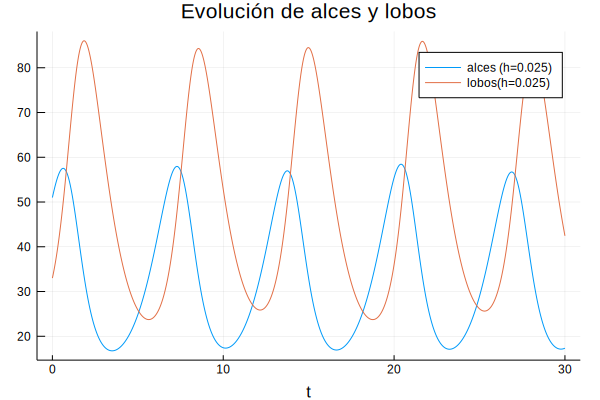

In [5]:
tt = res[:,1]
vv = res[:,2]
ww = res[:,3]

plot(tt,[vv ww],title="Evolución de alces y lobos",xlabel="t",label=["alces (h=0.025)" "lobos(h=0.025)"])

<a href="#top">Back to the top</a>

## 2-Error de los métodos de Euler y Euler mejorado
** Estudio experimental del error de los métodos de Euler y Euler mejorado para un modelo simplificado de robot móvil**

### Problema Robot Móvil

Consideremos el problema de determinar la evolución de la posición y la orientación de una plataforma móvil (un robot) que se mueve en una superficie plana horizontal con dos ruedas de radio $R$ situadas en paralelo a una distancia $L$ entre sí, conocidas la evolución de las velocidades angulares $\omega_l(t)$ y $\omega_r(t)$ de la rueda izquierda y la rueda  derecha respectivamente. Dicho problema se puede modelar por medio del siguiente sistema de EDOs

<a id='Edo-Robot'></a>
\begin{equation*}
 \begin{split}
         \frac{d x}{dt} &= \pi \, R\, (\omega_l(t) +\omega_r(t))\,  \cos(\theta), \\ 
      \frac{d y}{dt} &=\pi \, R\, (\omega_l(t) +\omega_r(t))\, \sin(\theta), \\ 
      \frac{d \theta}{dt} &= \frac{2\pi \, R}{L} (\omega_r(t) - \omega_l(t)), 
    \end{split}  \hspace{12em} \tag{3}
\end{equation*}

donde $(x,y)$ son las coordenadas del centro del eje de las ruedas, $\theta$ es el ángulo formado entre el eje que une las dos rueda y el eje horizontal del sistema de coordenadas cartesianas adoptado para el plano sobre el que se mueve el robot. Consideraremos el metro como unidad de longitud, y el segundo como unidad de tiempo.

A lo largo de este ejercicio consideraremos el caso en que 

<a id='Fun-Robot'></a>
\begin{equation*}
\begin{split}
L&=0.5\, \mathrm{m}, \quad R=0.05\, \mathrm{m}, \\
\omega_l(t) &= \frac{3}{5} \sin(\pi t/125) -\frac{1}{200}, \quad 
\omega_r(t) = \frac{3}{5}\sin(\pi t/125) +\frac{1}{200},
\end{split}
\tag{4}
\end{equation*}

y el robot se sitúa inicialmente en el origen de coordenadas, orientado horizontalmente, es decir, 

<a id='Ini-Robot'></a>
\begin{equation*}
x(0) = 0, \quad y(0)=0, \quad \theta(0)=0. \hspace{16em} \tag{5}
\end{equation*}

El problema [(3)](#Edo-Robot)-[(4)](#Fun-Robot) tiene  una única solución $u(t)=(x(t),y(t),\theta(t))$.

Nuestro objetivo es estudiar el error que cometemos al aproximar las solución $u(t)=(x(t),y(t),\theta(t))$ en el intervalo temporal $t \in [0,1000]$ por medio del método de Euler mejorado y compararlo con el método de Euler.

### 2.1- Ejercicio

- **Aproximar la solucion $u(t)=(x(t),y(t),\theta(t))$  para los valores de $t$ de la discretización temporal 
\begin{equation*}
t_0=0,\ t_1=h,\ t_2=2h,\ldots,\ t_{49}=980,\ t_n=1000,
\end{equation*}
donde $h=20$.**

In [6]:
function fRobot(t,u,p)
    L = p[1]
    R = p[2]
    x = u[1]
    y = u[2]      
    theta = u[3]
    wl = 3/5 * sin( pi*t/125 ) - 1/200
    wr = 3/5 * sin( pi*t/125 ) + 1/200
    dx =  pi*R * (wl+wr) * cos(theta)
    dy =  pi*R * (wl+wr) * sin(theta)
    dtheta = ( 2*pi*R/L ) * (wr-wl)
    return [dx,dy,dtheta]
end

fRobot (generic function with 1 method)

In [7]:
n = 50
T = 1000

p = [0.5 0.05]
t0 = 0
u0 = [0,0,0]

res = EulerMejorado(u0, t0, T, n, fRobot, p)

51×4 Array{Float64,2}:
    0.0   0.0           0.0          0.0     
   20.0   0.935689      0.0588685    0.125664
   40.0   3.47066       0.54244      0.251327
   60.0   6.88058       1.65039      0.376991
   80.0  10.2313        3.22711      0.502655
  100.0  12.6838        4.78356      0.628319
  120.0  13.7532        5.66817      0.753982
  140.0  13.4297        5.32374      0.879646
  160.0  12.1272        3.53104      1.00531 
  180.0  10.4839        0.541856     1.13097 
  200.0   9.09887      -2.9564       1.25664 
  220.0   8.30728      -6.03944      1.3823  
  240.0   8.07965      -7.84129      1.50796 
    ⋮                                        
  780.0   8.30728       6.03944      4.90088 
  800.0   9.09887       2.9564       5.02655 
  820.0  10.4839       -0.541856     5.15221 
  840.0  12.1272       -3.53104      5.27788 
  860.0  13.4297       -5.32374      5.40354 
  880.0  13.7532       -5.66817      5.5292  
  900.0  12.6838       -4.78356      5.65487 
  920.0  10

> **Comprobación**
>
>Las primeros filas resultados debería coincidir con lo siguientes 
 
                t     x              y           \theta
                0.0  0.0            0.0          0.0     
               20.0  0.935689       0.0588685    0.125664
               40.0  3.47066        0.54244      0.251327
               60.0  6.88058        1.65039      0.376991
               80.0  10.2313        3.22711      0.502655
              100.0  12.6838        4.78356      0.628319
              120.0  13.7532        5.66817      0.753982


- **Representar en una misma figura la evolución de las funciones $x(t)$, $y(t)$, y $\theta(t)$ respecto del tiempo en el intervalo temporal $t \in [0,1000]$.**

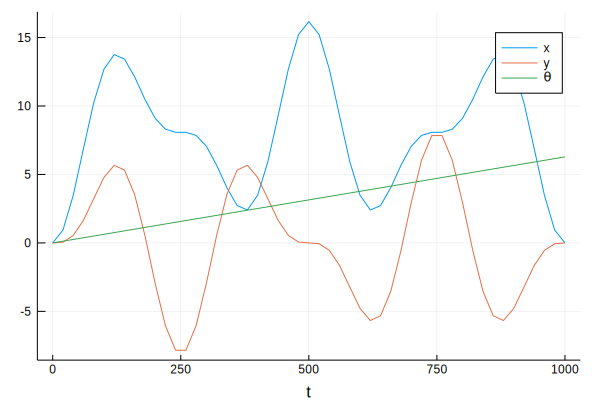

In [8]:
tt = res[:,1]
xx = res[:,2]
yy = res[:,3]
thetas = res[:,4]
plot(tt,[xx, yy,thetas], xlabel="t",label=["x" "y" "\\theta"])

### 2.2- Ejercicio

- **Representar en una figura la trayectoria descrita por el centro del eje de las ruedas en el plano xy**

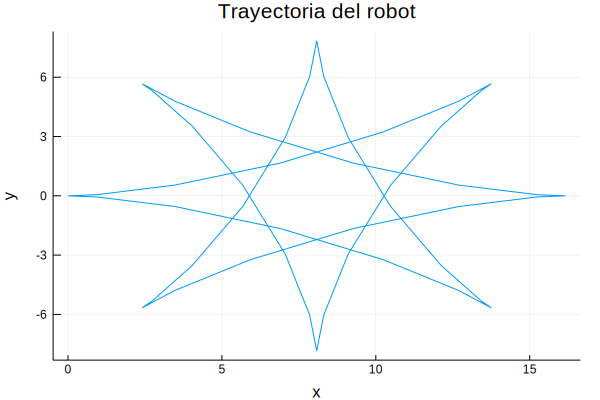

In [9]:
plot(xx, yy, title="Trayectoria del robot", xlabel="x",ylabel="y",label="")

> **Comprobación**
>
>Debería obtenerse una figura en forma de estrella de 8 puntas (que es la trayectoria que sigue la plataforma móvil). 



<a href="#top">Back to the top</a>

### 2.3- Ejercicio


- **Se puede comprobar que en el caso considerado en que $L$, $R$, $\omega_l(t)$, y $\theta_r(t)$ están dados por [(4)](#Fun-Robot), la solución del problema [(3)](#Edo-Robot)-[(5)](#Ini-Robot)  es exáctamente**


\begin{align*}
x(t) &= 8-5 \cos \left(\frac{3 \pi 
   t}{500}\right)-3 \cos
   \left(\frac{\pi  t}{100}\right), \\
   y(t) &= 5 \sin \left(\frac{3 \pi 
   t}{500}\right)-3 \sin
   \left(\frac{\pi  t}{100}\right), \\
   \theta(t) &= \frac{\pi}{500} t.
\end{align*}


Ello nos permite calcular el error cometido al aproximar la solución exacta  $u(t)=(x(t),y(t),\theta(t))$ en $t=t_k$ (para $k=1,2\ldots,n$) por los valores $u_k=(x_k,y_k,\theta_k)$ obtenidos en el apartado anterior (con $n=50$) por medio del método de Euler mejorado. Calcularemos para cada $k=1,2\ldots,n$ el error cometido

<a id='Error'></a>
\begin{equation*}
e(t_k)=||u_k -u(t_k)|| = \sqrt{(x_k-x(t_k))^2+(y_k-y(t_k))^2+(\theta_k-\theta(t_k))^2},
\hspace{4em} \tag{6}
\end{equation*}


y representaremos dicho error respecto de los tiempos $t_k$. 

In [10]:
"""
Metodo de Euler mejorado
"""
function  EulerMejorado(u0, t0, T, n, f, p, m=1,h = (T-t0)/(n*m))
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      #W2 = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      #W2[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
      #ttmp = 0
      #utmp = 0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        for i in 1:m
            # Aqui deberían ir varias líneas de código
            dutmp = f(tj, uj, p)
            utmp = uj + h/2 * dutmp
            ttmp = tj + h/2
            
            duj = f(ttmp, utmp, p)
            uj = uj + h * duj
            tj = tj + h
        end
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
        #W2[j+1,:] = [ttmp; utmp] # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W#,W2
  end

EulerMejorado

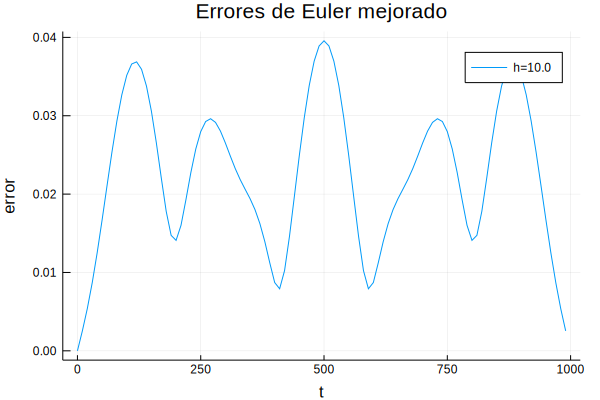

In [11]:
function RobotSol(t)
    theta = pi/500 * t
    aux1 = 3*pi*t/500
    aux2 = pi*t/100
    x = 8 - 5*cos(aux1) - 3*cos(aux2)
    y = 5*sin(aux1) - 3*sin(aux2)
    return [x, y, theta]
end

function errorEM(n)   
    
    T = 1000
    p = [0.5 0.05]
    t0 = 0
    u0 = [0,0,0]
    m = 1
    h = T/n
    res = EulerMejorado(u0, t0, T, n, fRobot, p,m,h)
    
    e = zeros(n,1)
    t = zeros(n,1)
    for j in 1:n
        # Varias líneas de código
        out = RobotSol(res[j,1])
        e[j] = sqrt( (res[j,2]-out[1])^2 + (res[j,3]-out[2])^2 + (res[j,4]-out[3])^2 )
        t[j] = res[j,1]
    end
    tt = t
    errors = e
    return (tt,errors)
end


n=100
h = T/n
(tt, erroresEM) = errorEM(n)

plot(tt,erroresEM,
     title="Errores de Euler mejorado",
     xlabel="t",ylabel="error", label=string("h=",h))

### 2.4- Ejercicio

- **Para observar como disminuye el error [(6)](#Error) al considerar discretizaciones cada vez más finas, representar en una misma figura las gráficas de los errores cometidos al aplicar el método de Euler mejorado con $n=100$, $n=200$, y $n=300$.**

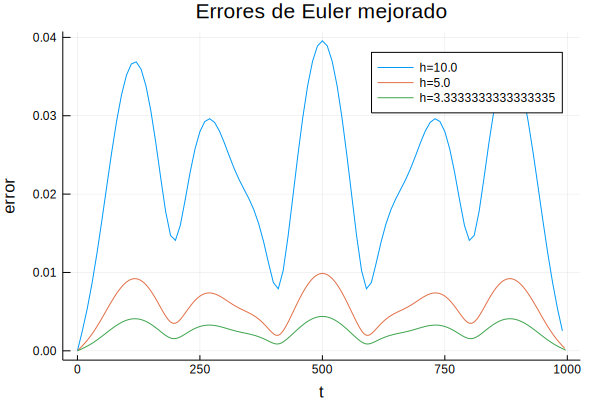

In [12]:
n=[100,200,300]

h1 = T/n[1]
(tt1, erroresEM1) = errorEM(n[1])

h2 = T/n[2]
(tt2, erroresEM2) = errorEM(n[2])

h3 = T/n[3]
(tt3, erroresEM3) = errorEM(n[3])

plot(tt1,erroresEM1,
         title="Errores de Euler mejorado",
         xlabel="t",ylabel="error", label=string("h=",h1))

plot!(tt2,erroresEM2,
         title="Errores de Euler mejorado",
         xlabel="t",ylabel="error", label=string("h=",h2))

plot!(tt3,erroresEM3,
         title="Errores de Euler mejorado",
         xlabel="t",ylabel="error", label=string("h=",h3))

### 2.5- Ejercicio

- **Representar ahora en una misma figura  las gráficas de dichos errores divididos por $h^2$ (donde $h=1000/n$) para los casos $n=100$, $n=200$, y $n=300$. **

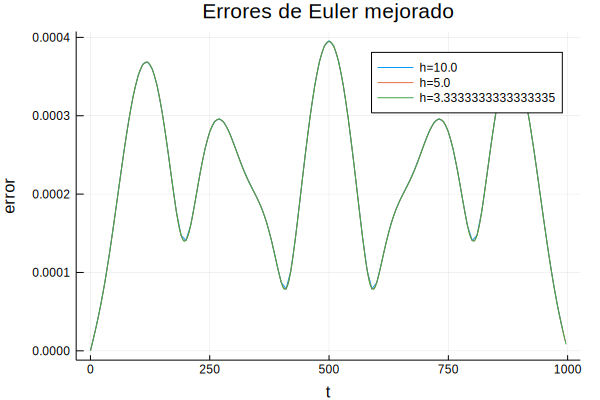

In [13]:
plot(tt1,erroresEM1/h1^2,
         title="Errores de Euler mejorado",
         xlabel="t",ylabel="error", label=string("h=",h1))

plot!(tt2,erroresEM2/h2^2,
         title="Errores de Euler mejorado",
         xlabel="t",ylabel="error", label=string("h=",h2))

plot!(tt3,erroresEM3/h3^2,
         title="Errores de Euler mejorado",
         xlabel="t",ylabel="error", label=string("h=",h3))

> **Comprobación**
>
>Las tres gráficas deberían superponerse, lo que indicaría que el error del método de Euler modificado a resultado (como es de esperar por ser un método de segundo orden) es aproximadamente proporcional a $h^2$. 



### 2.6- Ejercicio

- **Repetir el apartado anterior para el método de Euler, pero representando 
respecto a los tiempos $t=t_k$ los errores [(6)](#Error) divididos por $h$. **

In [14]:
"""
Metodo de Euler
"""
function  Euler(u0, t0, T, n, f, p, m=1,h = (T-t0)/(n*m))
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
    d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
    W = zeros(n+1,d+1)
    W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
    tj = t0
    uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        for i in 1:m
            duj = f(tj, uj, p)
            uj = uj + h * duj
            tj = tj + h
        end
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo         
    end
    return W
  end

Euler

In [15]:
function errorE(n)   
    
    T = 1000.0
    p = [0.5 0.05]
    t0 = 0
    u0 = [0,0,0]
    m = 1
    h = T/n
    res = Euler(u0, t0, T, n, fRobot, p,m,h)
    
    e = zeros(n,1)
    t = zeros(n,1)
    for j in 1:n
        # Varias líneas de código
        out = RobotSol(res[j,1])
        e[j] = sqrt( (res[j,2]-out[1])^2 + (res[j,3]-out[2])^2 + (res[j,4]-out[3])^2 )
        t[j] = res[j,1]
    end
    tt = t
    errors = e
    return (tt,errors)
end

errorE (generic function with 1 method)

In [16]:
n=[100,200,300]

h1 = T/n[1]
(tt1, erroresE1) = errorE(n[1])

h2 = T/n[2]
(tt2, erroresE2) = errorE(n[2])

h3 = T/n[3]
(tt3, erroresE3) = errorE(n[3])

([0.0; 3.33333; … ; 993.333; 996.667], [0.0; 0.0263032; … ; 0.0523356; 0.0262744])

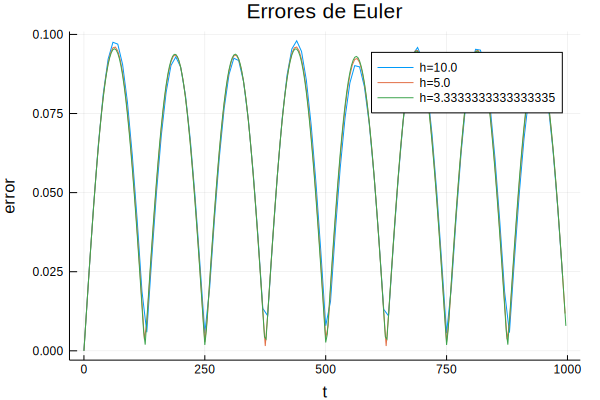

In [17]:
plot(tt1,erroresE1/h1,
         title="Errores de Euler mejorado",
         xlabel="t",ylabel="error", label=string("h=",h1))

plot!(tt2,erroresE2/h2,
         title="Errores de Euler mejorado",
         xlabel="t",ylabel="error", label=string("h=",h2))

plot!(tt3,erroresE3/h3,
         title="Errores de Euler",
         xlabel="t",ylabel="error", label=string("h=",h3))

> **Comprobación**
>
>Las tres gráficas deberían ser muy parecidas, lo que indicaría que el error del método de Euler a resultado (como es de esperar por ser un método de primer orden) es aproximadamente proporcional a $h$. 



### 2.7- Ejercicio

- **En virtud de lo deducido en los dos apartados anteriores, ¿que valor de $n$ y $h$ deberíamos tomar respectivamente en el caso del método de Euler y en el caso del método de Euler mejorado  para que el error máximo
$$\displaystyle \max_{1\leq k\leq n} ||u(t_k)-u_k|||$$ 
fuera menor que $10^{-8}$? (Hay que responder a esta pregunta utilizando sólamente los resultados de los apartados anteriores,  sin volver a aplicar el método correspondiente para valores de $n$ mayores).**

> **Respuesta para Euler**
>
> Incluir aquí la respuesta, seguida del razonamiento y cálculos (estos últimos en una o varias celdas de código).
>

> **RESPUESTA:**
> Para que el error maximo **eM < 10e-8** con el metodo Euler, debemos tomar una discretizacion que sea **1e7** veces mas fina que cuando n=100 y h = 10, es decir **n = 1e9** y **h = 1e-6**.

>**Razonamiento:**
>
>En el método de Euler, al tomar una discretización el doble de fina (es decir, al dividir h por dos), el error se divide por dos aproximadamente. El error cometido es aproximadamente proporcional a h. 
>
>Sabemos que el error maximo (eM) se divide por approx g= hi/hj, con g = el factor multiplicativo de pasos 
addicinales en la discretizacion hj relativo a hi. Por ejemplo, si g = 10/5 = 2, el error eM ~ eM/2. De misma manera, 
si g = 10/3.33 =3, el error eM ~ eM/3. Por lo cual, sabemos que eM es aproximadamente proporcional a g.
>
>eM/g < 1e-7
>
>eM ~ 1
>
>1/g <= 1e-7
>
>g = 1e7
>
>1/1e7 <= 1e-7
>
> g = 10/(T/n) = 1e7
>
> g = 10/(1000/n) = 1e7
>
>10/(1000/n) = 1e7
>
>(1000/n) = 10/1e7
>
>n = 1000 / (10/1e7)
>
>n = 1e9
>
> h = 1000/1e9 = 1e-6
>

In [18]:
# Vemos la relacion entre el error maximal (eM) y g el factor multiplicativo relacionado con el aumento 
# en la longitud de pasos

T = 1000

h1 = T/100
h2 = T/200
h3 = T/300

print([h1/h1,maximum(erroresE1)/maximum(erroresE1)])
print("\n")
print([h1/h2,maximum(erroresE2)/maximum(erroresE1)])# al tomar una discretizacion el doble de fina,
                                                    #el error se divide por aprox. dos
print("\n")
print([h1/h3,maximum(erroresE3)/maximum(erroresE1)])# al tomar una discretizacion el triple de fina,
                                                    #el error se divide por aprox. tres

[1.0, 1.0]
[2.0, 0.489976]
[3.0, 0.324779]

In [19]:
# comprobamos el resultado obtenido
n = 1e9

print("n=",string(n),"\n")
print("h=",string(T/n),"\n")
print("g:",string((T/100)/(T/n)))
print("\n")


maximum(erroresE1)/((T/100)/(T/n))< 10e-8# debe ser TRUE


n=1.0e9
h=1.0e-6
g:1.0e7


true

> **Respuesta para Euler mejorado**
>
>Incluir aquí la respuesta, seguida del razonamiento y cálculos (estos últimos en una o varias celdas de código).
>
> **RESPUESTA:**
> Para que el error maximo **eM < 10e-8**, debemos tomar una discretizacion que sea **2000** veces mas fina que cuando n=100 y h = 10, es decir **n = 200000** y **h = 0.005**.

>**Razonamiento:**
>
>En el método de **Euler mejorado**, al tomar una discretización
el doble de fina (es decir, al dividir h por dos), el error se
divide por cuatro aproximadamente. El error cometido es
aproximadamente proporcional a **h²**.
>
>Sabemos que el error maximo (eM) se divide por approx por g² con g= (hi/hj). Por ejemplo, si g = 10/5 = 2, el error eM ~ eM/4. De misma manera, si g = 10/3.33 =3, el error eM ~ eM/9. Por lo cual, sabemos que eM es aproximadamente proporcional a g².
>
>eM/g² < 1e-7
>
>eM ~ 0.3956
>
>0.3956/g² < 1e-7
>
>g² = 0.3956/1e-7
>
>g = sqrt(0.3956/1e-7)
>


>g² ~ 4e6
>
>0.3956/4e6 <= 1e-7
>
> g² = (10/(T/n))² = 4e6
>
> g = (10/(T/n)) = sqrt(4e6)
>
> g = 10/(1000/n) = sqrt(4e6)
>
> 10/(1000/n) = sqrt(4e6)
>
>(1000/n) = 10/sqrt(4e6)
>
>n = 1000 / (10/sqrt(4e6))
>
>n = 200000
>
> h = 1000/200000 = 0.005
>

In [20]:
# Vemos la relacion entre el error maximal (eM) y g el factor multiplicativo relacionado con el aumento 
# en la longitud de pasos

T = 1000

h1 = T/100
h2 = T/200
h3 = T/300

print([h1/h1,maximum(erroresEM1)/maximum(erroresEM1)])
print("\n")
print([h1/h2,maximum(erroresEM2)/maximum(erroresEM1)])# al tomar una discretizacion el doble de fina,
                                                    #el error se divide por aprox. dos²
print("\n")
print([h1/h3,maximum(erroresEM3)/maximum(erroresEM1)])# al tomar una discretizacion el triple de fina,
                                                    #el error se divide por aprox. tres²

[1.0, 1.0]
[2.0, 0.24959]
[3.0, 0.110895]

In [21]:
# comprobamos el resultado obtenido
n = 1000 / (10/sqrt(4e6))

print("n=",string(n),"\n")
print("h=",string(T/n),"\n")
print("g²:",string(((T/100)/(T/n))^2))
print("\n")

maximum(erroresEM1)/((T/100)/(T/n)^2)< 10e-8# debe ser TRUE


n=200000.0
h=0.005
g²:4.0e6


true

### 2.8- Ejercicio

 - **¿Qué podemos decir de la eficiencia
 de ambos métodos en este ejemplo, para obtener aproximaciones con errores menores que $10^{-8}$ en el intervalo temporal $[0,1000]$? (Un método es más eficiente que otro si consigue la misma precisión con menos tiempo de cálculo.)**

In [22]:
start = time()
(tt1, erroresEM) = errorEM(200000)
t1 = time()-start

print(t1)
print("\n")
print(maximum(erroresEM))

0.9382190704345703
9.850699456175114e-9

In [28]:
(1e9/200000)*9

45000.0

> **Respuesta**
> 
>  Podemos decir de la eficiencia de ambos métodos en este ejemplo, que para obtener aproximaciones con errores menores que $10^{-8}$ en el intervalo temporal $[0,1000]$ el método de Euler mejorado es más eficiente que el metodo de Euler,ya que consigue la misma precisión con menos tiempo de cálculo. El metodo de Euler mejorado solo requiere 200,000 pasos y aprox 9s para alcanzar un nivel de error <$10^{-8}$, y el metodo de Euler requiere 1e9 pasos. Por lo cual, si el tiempo de computacion aumente de manera lineal, el metodo de Euler requiere aprox. 1e9/200000 * 9 = 45000 s para alcanzar el mismo nivel de precision. Por lo cual, el metodo de Euler mejorado es claramente mas efficiente.

<a href="#top">Back to the top</a>

### Valoración

_Incluir aquí los comentarios de valoración de la tarea a entregar (dificultad, interés, etc, incluidas, si se quiere, sugerencias de mejora del ejercicio), así como una estimación del tiempo dedicado al trabajo de la semana (desglosado en el tiempo de estudio de material teórico, tiempo de dedicación a la participación activa o pasiva en los foros, tiempo de implementación y experimentación con los problemas prácticos planteados, y tiempo de preparación del documento jupyter final)._
> dificultad: medio
>
> interes: alto
>
> tiempo de estudio de material teórico: 2h
>
> tiempo de dedicación a la participación en los foros: 1h
>
> tiempo de implementación y experimentación: 10h
>
> tiempo de preparación del documento jupyter final: 4h